In [1]:
import matplotlib.pyplot as plt
from IPython.display import Latex
from ipywidgets import interactive, interact, fixed
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [75]:
from numpy import array,cos,rad2deg,deg2rad,arcsin,sin,linspace,arange

In [76]:
n0=1
nl=1.38
nh=2.32
nsub=1.5

In [77]:
thetal=0.
thetah=0.
theta0=0.
thetasub=0.
q=1

In [108]:
def A(nh,nl,n0,nsub,theta0,qmax):
    q=arange(1,qmax+1,1)

    thetal=arcsin(n0/nl*sin(deg2rad(theta0)))
    thetah=arcsin(nl/nh*sin(deg2rad(thetal)))
    thetasub=arcsin(nh/nsub*sin(deg2rad(thetah)))
    a11=pow(-nh*cos(thetal)/(nl*cos(thetah)),q)*cos(thetasub)/cos(theta0)+pow(-nl*cos(thetah)/(nh*cos(thetal)),q)*nsub/n0
    a21=pow(-nh*cos(thetal)/(nl*cos(thetah)),q)*cos(thetasub)/cos(theta0)-pow(-nl*cos(thetah)/(nh*cos(thetal)),q)*nsub/n0
    return thetal, thetah, thetasub, a11, a21, q

In [109]:
A(2.4,1.3,1,1.5,5,30)

(0.067093204363368034,
 0.0006342901135759217,
 1.7712721432162191e-05,
 array([ -7.30797353e+00,   1.24033823e+01,  -2.22727109e+01,
          4.07145510e+01,  -7.48269555e+01,   1.37739398e+02,
         -2.53666159e+02,   4.67226119e+02,  -8.60616063e+02,
          1.58524728e+03,  -2.92002201e+03,   5.37867979e+03,
         -9.90752984e+03,   1.82496747e+04,  -3.36159104e+04,
          6.19205250e+04,  -1.14057641e+05,   2.10094237e+05,
         -3.86993699e+05,   7.12842604e+05,  -1.31305647e+06,
          2.41865073e+06,  -4.45515596e+06,   8.20639972e+06,
         -1.51161928e+07,   2.78440353e+07,  -5.12887283e+07,
          9.44738655e+07,  -1.74020912e+08,   3.20546615e+08]),
 array([ -5.67930952e+00,   1.15192002e+01,  -2.17926990e+01,
          4.04539583e+01,  -7.46854828e+01,   1.37662595e+02,
         -2.53624463e+02,   4.67203483e+02,  -8.60603774e+02,
          1.58524060e+03,  -2.92001839e+03,   5.37867783e+03,
         -9.90752877e+03,   1.82496741e+04,  -3.36159100e+

In [110]:
a12=pow(-nh*cos(thetal)/(nl*cos(thetah)),q)*cos(thetasub)/cos(theta0)-pow(-nl*cos(thetah)/(nh*cos(thetal)),q)*nsub/n0

In [132]:
def plotfresnelData(no,nl,nh,nsub,qmax,theta0):
    
    thetal, thetah,thetasub, a11,a21,q=A(nh,nl,n0,nsub,theta0,qmax)
    tptot=1/a11
    rptot=a21/a11
    rcdef = plt.rcParams.copy()
    newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (16, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}
    # Update the global rcParams dictionary with the new parameter choices
# Before doing this, we reset rcParams to its default again, just in case
    plt.rcParams.update(rcdef)
    plt.rcParams.update(newparams)
    
   
    # Make the new figure with new formatting
    fig, axes = plt.subplots(1,1)

    axes.plot(q, tptot,'o-', label ='tp')
    axes.plot(q,rptot, label= 'rp')
  
    axes.legend()
   

    plt.rcParams.update(rcdef)       
    plt.rcParams.update(rcdef)
    
   

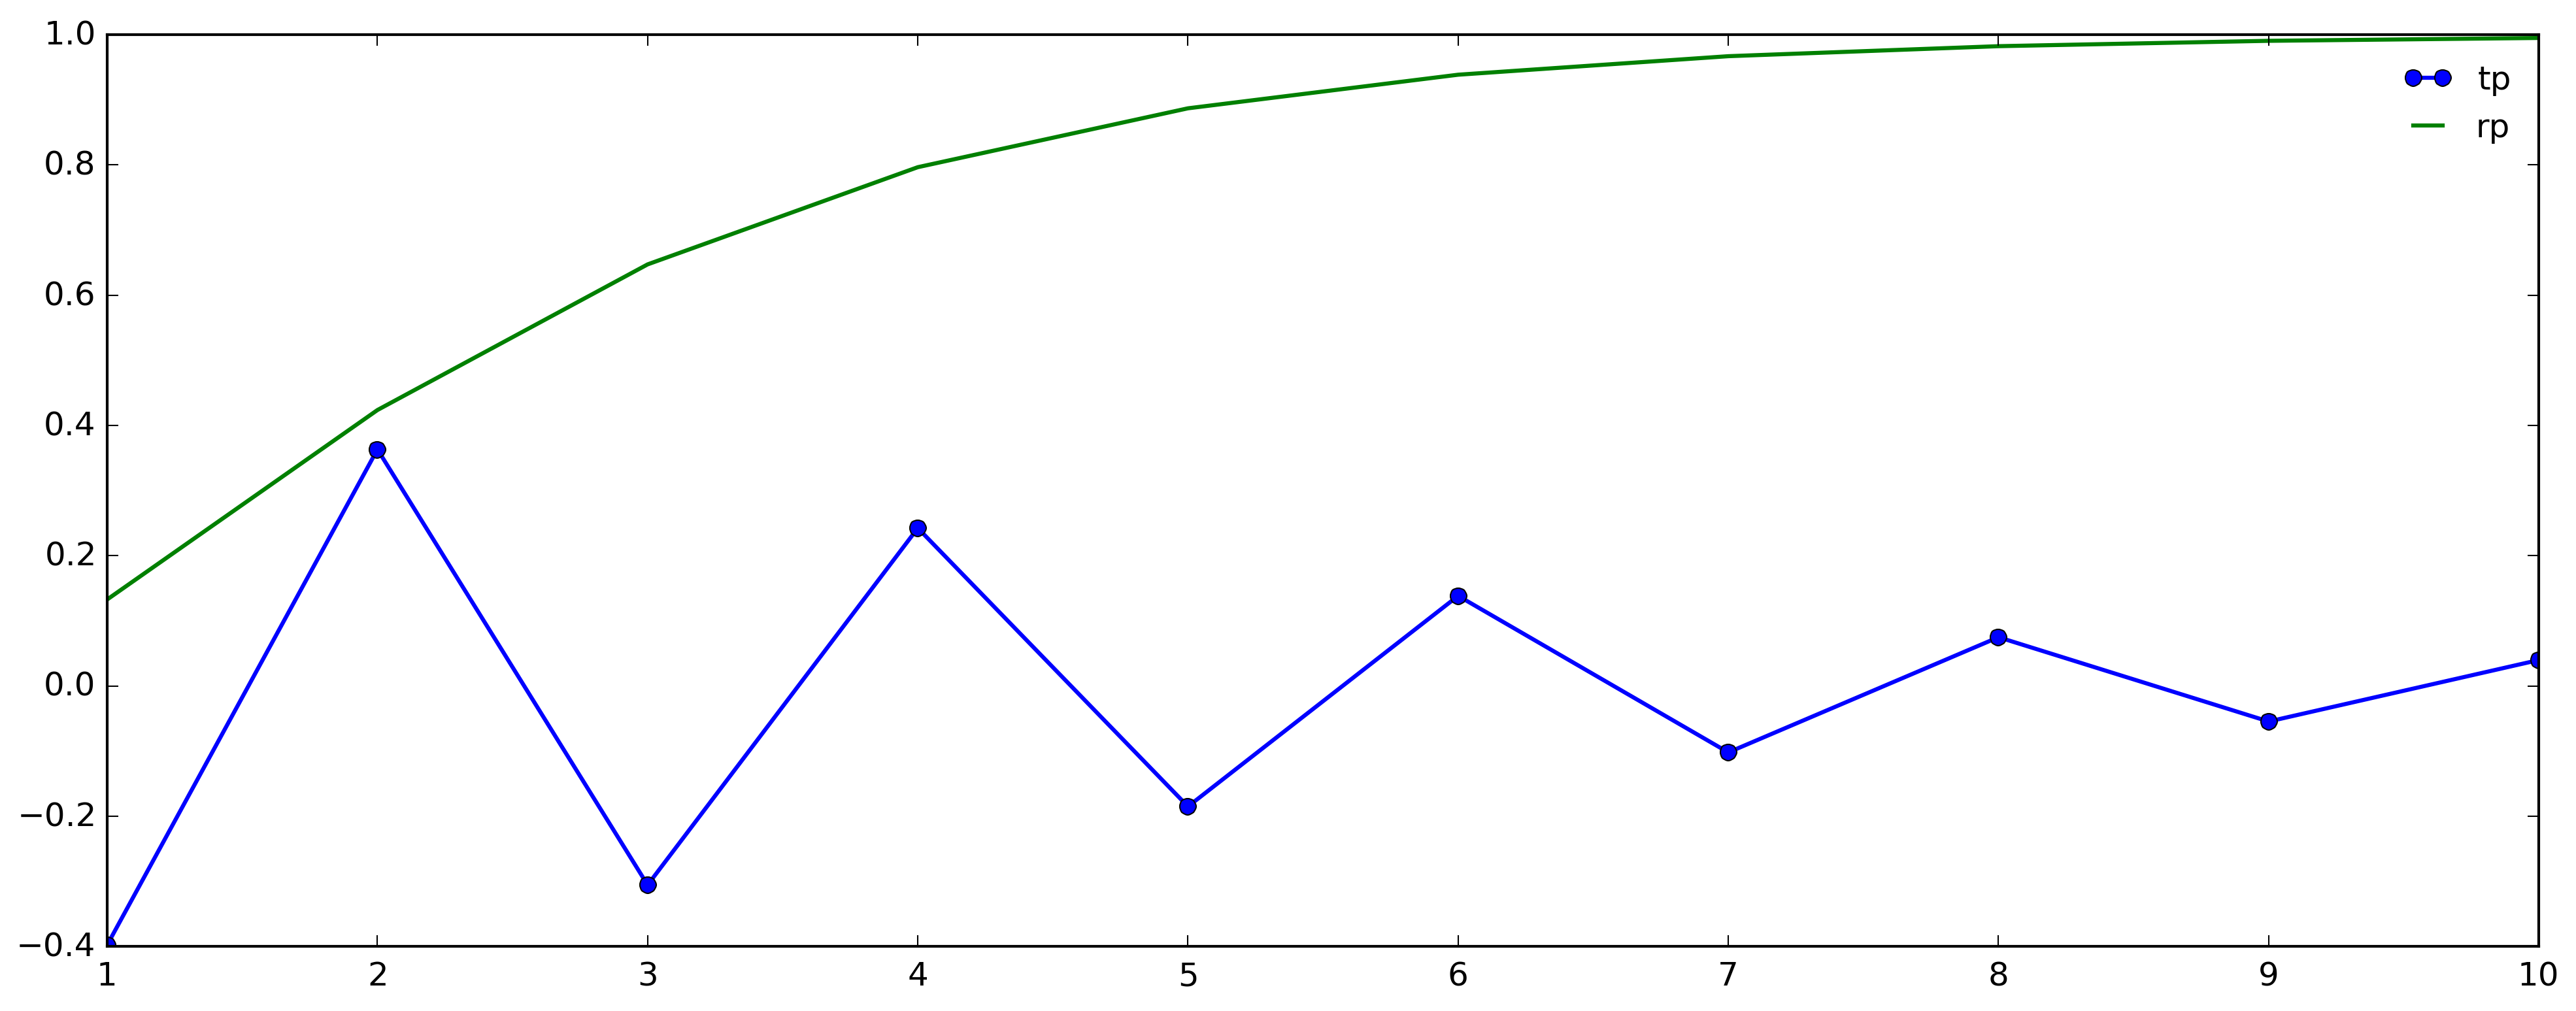

In [140]:
plotfresnelData(1.,1.4,2.3,1.5,10,50.)